In [6]:
import scipy.stats as stats
import numpy as np
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
conf_energy_dict = {}
conf_time_dict = {}
lang_energy_dict = {}
lang_time_dict = {}
lang_num_dict = {}

all_energy_list = []
avg_energy_list = []

df_energy_dict = {}


with open("..\\data\\Data.csv", "r") as f:
    lines = f.readlines()
    for line in lines:
        if line.startswith("Group"):
            continue
        line = line.strip().split(",")
        if line[1] == "" and line[3] == "":
            continue
        if line[1] == "" and line[3] != "":
            avg_energy_list.append(float(line[3]))
            continue
        lang = line[0]
        conf = line[1]
        energy = line[3]
        time = line[5]
        if conf not in conf_energy_dict:
            conf_energy_dict[conf] = []
        
        conf_energy_dict[conf].append(energy)
        if conf not in conf_time_dict:
            conf_time_dict[conf] = []        
        conf_time_dict[conf].append(time)

        if lang not in lang_energy_dict:
            lang_energy_dict[lang] = []
        lang_energy_dict[lang].append(energy)
        
        if lang not in lang_time_dict:
            lang_time_dict[lang] = []
        lang_time_dict[lang].append(time)
        
        if lang not in lang_num_dict:
            lang_num_dict[lang] = 0
        lang_num_dict[lang] += 1
        
        
        all_energy_list.append(energy)
        
    for conf in conf_energy_dict:
        df_energy_dict[conf] = pd.DataFrame({
            'values': conf_energy_dict[conf],
            'groups': [conf] * len(conf_energy_dict[conf])
        })
print(lang_num_dict)
        

{'go': 15, 'java': 10, 'node': 15, 'dotnet': 15, 'python': 20, 'ruby': 15, 'rust': 15}


In [8]:

lowest_energy_list = []

for conf in conf_energy_dict:
    conf_energy_dict[conf] = [float(x) for x in conf_energy_dict[conf]]
    lowest_energy_list.append(np.min(conf_energy_dict[conf]))
print(lowest_energy_list)

[1378.5359, 1373.4679, 1368.6421, 2202.75, 2206.2947, 1513.9829, 1509.3981, 1732.5303, 1664.2741, 1704.301, 1740.357, 1617.7124, 1667.4236, 1638.9738, 1644.5658, 2096.752, 2049.4461, 1959.7224, 1323.5156, 1320.281, 1331.1644]


In [9]:
def total_box_plot(df_dict: dict):
        plt.figure(figsize=(10, 30))

        x_values = []
        for lang, df in df_dict.items():
            x_values.extend(df['groups'])


        y_values = []
        for lang, df in df_dict.items():
            y_values.extend(df['values'].values)
        
        y_values = [float(v) for v in y_values]

        data = pd.DataFrame({'Groups': x_values, 'Values': y_values})
        
        breaklines = []
        defaultlines = []
        
        temp = -0.5
        for key, value in lang_num_dict.items():
            defaultlines.append(temp+0.5)
            new_value = value/5+temp
            breaklines.append(new_value)
            temp = new_value
            
        custom_pallete = ['#FF6347', '#FF6347', '#FF6347',
                          '#4682B4', '#4682B4',
                          '#32CD32', '#32CD32', '#32CD32',
                          '#FF1493', '#FF1493', '#FF1493',
                          '#FFD700', '#FFD700',
                          '#8A2BE2', '#8A2BE2', '#8A2BE2',
                          '#FF8C00', '#FF8C00', '#FF8C00',
                          ]

        plt.figure(figsize=(10, 12))
        sns.boxplot(data=data, x='Groups', y='Values', palette=custom_pallete)
        for item in breaklines:
            plt.axvline(x = item, color='gray', linestyle='--', alpha=0.5)

        for i in (range(len(defaultlines)-1)):
            item = defaultlines[i]
            y_pos = float(lowest_energy_list[int(item)])
            plt.annotate('Default', xy=(item, y_pos), xytext=(item, float(y_pos)-10.0),
                         fontsize=10, ha='center', va='top', rotation=90)
        
        # plt.title('Boxplot of Values by Group for All Languages')
        plt.yscale('log')
        plt.ylabel('Energy Consumption (J)')
        plt.xlabel('Configuration')
        plt.xticks(rotation=90)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.savefig("boxplot.pdf")
        plt.show()

<Figure size 1000x3000 with 0 Axes>

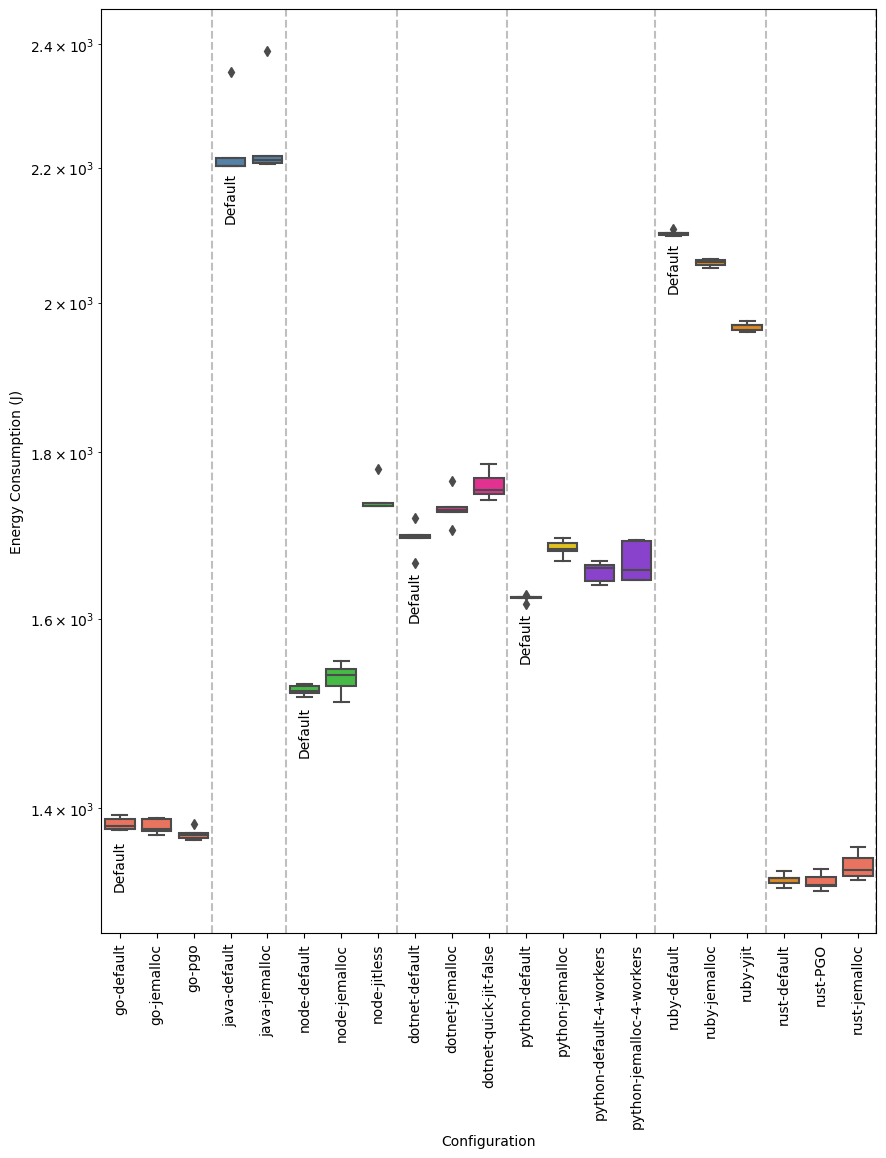

In [10]:
total_box_plot(df_energy_dict)